In [55]:
pip install pandas numpy scikit-learn tensorflow streamlit

In [57]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK stopwords
nltk.download('stopwords')

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# Load CSV
df = pd.read_csv(r"C:\Users\HP\Downloads\Twitter_Data.csv")

In [61]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [63]:
# Check column names
print("Columns in CSV:", df.columns.tolist())
print(df.head(2))

Columns in CSV: ['textID', 'text', 'selected_text', 'sentiment']
       textID                                            text  \
0  cb774db0d1             I`d have responded, if I were going   
1  549e992a42   Sooo SAD I will miss you here in San Diego!!!   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  


In [65]:
# Preprocess text (from previous step)
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+|#\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [67]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [68]:
# Use correct label column name (e.g., 'label')
y = df['sentiment'].map({'positive': 2, 'negative': 1, 'neutral':0 }).values  # Adjust 'label' to match your CSV

In [69]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['cleaned_text'])

In [70]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [72]:
# Define the model
model = Sequential()
model.add(Input(shape=(X.shape[1],)))  # Explicit input layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # For multi-class classification

In [22]:
# Convert sparse matrix to dense (for Keras)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_dense.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dense, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.2923 - loss: -0.2202 - val_accuracy: 0.2756 - val_loss: -23.0933
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - accuracy: 0.2873 - loss: -77.9364 - val_accuracy: 0.2618 - val_loss: -374.3924
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 26s 95ms/step - accuracy: 0.2858 - loss: -626.0889 - val_accuracy: 0.2536 - val_loss: -1469.6052
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.2824 - loss: -2171.5088 - val_accuracy: 0.2499 - val_loss: -3528.8616
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - accuracy: 0.2853 - loss: -4696.4487 - val_accuracy: 0.2509 - val_loss: -6866.4248
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - accuracy: 0.2859 - loss: -9032.3262 - val_accuracy: 0.2470 - val_loss: -11514.2100
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.2813 - loss: -15063.8633 - val_accuracy: 0.2490 - val_loss: -17692.2012
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 

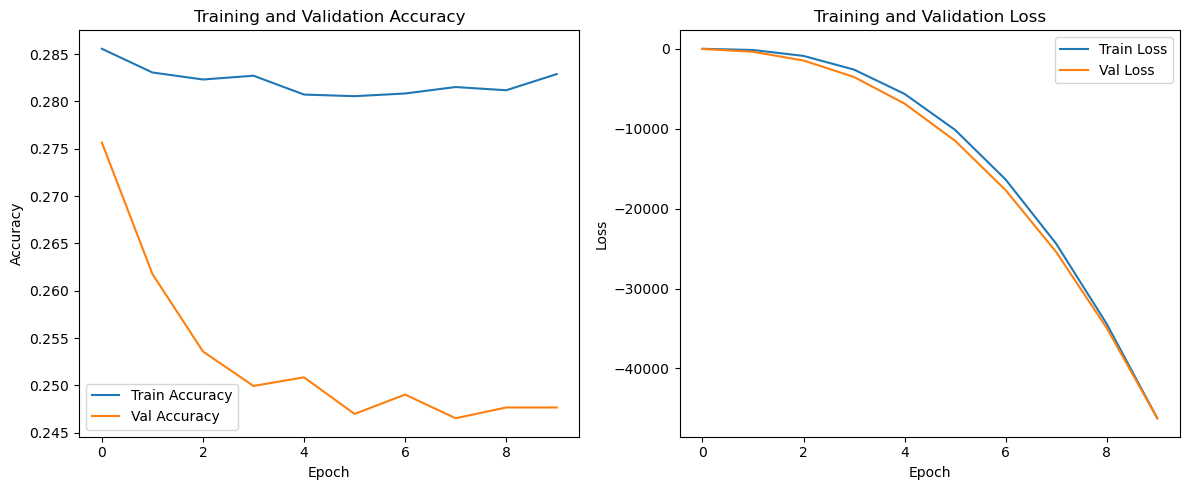

In [79]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
# Save model
model.save('sentiment_model.h5')

# Save TF-IDF vectorizer
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [41]:
def predict_sentiment(text):
    cleaned = preprocess_text(text)
    vectorized = tfidf.transform([cleaned]).toarray()
    prediction = model.predict(vectorized)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"

# Test with a sample text
print(predict_sentiment("I love this product! It's amazing."))
print(predict_sentiment("Worst experience ever. Terrible customer service."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Positive


In [43]:
# TFID to LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=100)  # Adjust maxlen based on text length

# Target variable
y = df['sentiment'].map({'positive': 2, 'negative': 1, 'neutral': 0}).values

KeyError: 'cleaned_text'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),  # word embeddings
    LSTM(128, return_sequences=False),                              # Try: GRU or SimpleRNN here
    Dropout(0.5),                                                   # Tune: dropout rate
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')                                  # 3-class output
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=10,             # Tune: number of epochs
                    batch_size=64,         # Tune: batch size
                    verbose=1)

Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


275/275 ━━━━━━━━━━━━━━━━━━━━ 58s 195ms/step - accuracy: 0.4956 - loss: 0.9820 - val_accuracy: 0.6893 - val_loss: 0.7328
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 53s 193ms/step - accuracy: 0.7607 - loss: 0.5969 - val_accuracy: 0.6939 - val_loss: 0.7349
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 53s 191ms/step - accuracy: 0.8190 - loss: 0.4645 - val_accuracy: 0.6882 - val_loss: 0.8186
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 53s 194ms/step - accuracy: 0.8597 - loss: 0.3834 - val_accuracy: 0.6857 - val_loss: 0.8939
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 55s 201ms/step - accuracy: 0.8837 - loss: 0.3160 - val_accuracy: 0.6720 - val_loss: 0.9834
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 56s 204ms/step - accuracy: 0.9076 - loss: 0.2567 - val_accuracy: 0.6645 - val_loss: 1.1076
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 53s 192ms/step - accuracy: 0.9213 - loss: 0.2165 - val_accuracy: 0.6423 - val_loss: 1.2846
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 53s 194ms/step - accuracy: 0.9360 - loss: 0.1788 - val

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=64,
                    callbacks=[early_stop])

Epoch 1/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 55s 201ms/step - accuracy: 0.9643 - loss: 0.0993 - val_accuracy: 0.6395 - val_loss: 2.1159
Epoch 2/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 53s 193ms/step - accuracy: 0.9619 - loss: 0.1017 - val_accuracy: 0.6350 - val_loss: 2.2065
Epoch 3/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 58s 210ms/step - accuracy: 0.9692 - loss: 0.0845 - val_accuracy: 0.6363 - val_loss: 2.2794
Epoch 4/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 61s 220ms/step - accuracy: 0.9731 - loss: 0.0767 - val_accuracy: 0.6300 - val_loss: 2.6191


In [83]:
df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons couldnt put releases already bought


In [85]:
# Step 3: Tokenize and Pad Sequences
tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=100)
y = df['sentiment'].values

In [89]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Step 5: Build the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=15000, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))  # 3 classes: positive, neutral, negative

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [93]:
# Optimizer and learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [95]:
# Step 6: Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [97]:
# Step 7: Train
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\HP\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\HP\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\HP\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\HP\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\HP\anaconda3\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "C:\Users\HP\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\HP\anaconda3\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "C:\Users\HP\anaconda3\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\HP\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\HP\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\HP\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\HP\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\HP\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\HP\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\HP\AppData\Local\Temp\ipykernel_7464\4167669400.py", line 2, in <module>

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 377, in fit

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 220, in function

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 133, in multi_step_on_iterator

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 114, in one_step_on_data

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 61, in train_step

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 690, in __call__

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 699, in call

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 63, in __call__

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\tree\tree_api.py", line 192, in map_structure

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\tree\optree_impl.py", line 111, in map_structure

  File "C:\Users\HP\anaconda3\Lib\site-packages\optree\ops.py", line 766, in tree_map

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 64, in <lambda>

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\ops\core.py", line 958, in convert_to_tensor

  File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 160, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/sparse_categorical_crossentropy/Cast}}]] [Op:__inference_multi_step_on_iterator_58124]

In [99]:
# Encode Labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])


In [101]:
# Encode Labels to integers
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment']).astype('int32')


In [103]:
X = pad_sequences(sequences, maxlen=100)
y = df['label'].values.astype('int32')  # <-- Enforce int32 here too

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Step 7: Train
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 207s 714ms/step - accuracy: 0.4869 - loss: 0.9953 - val_accuracy: 0.6864 - val_loss: 0.7339
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 183s 666ms/step - accuracy: 0.7600 - loss: 0.6178 - val_accuracy: 0.6941 - val_loss: 0.7229
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 178s 645ms/step - accuracy: 0.8232 - loss: 0.4719 - val_accuracy: 0.6859 - val_loss: 0.7679
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 183s 667ms/step - accuracy: 0.8670 - loss: 0.3740 - val_accuracy: 0.6764 - val_loss: 0.8641


In [107]:
# TFID to LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=100)  # Adjust maxlen based on text length

# Target variable
y = df['sentiment'].map({'positive': 2, 'negative': 1, 'neutral': 0}).values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),  # word embeddings
    LSTM(128, return_sequences=False),                              # Try: GRU or SimpleRNN here
    Dropout(0.5),                                                   # Tune: dropout rate
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')                                  # 3-class output
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=10,             # Tune: number of epochs
                    batch_size=64,         # Tune: batch size
                    verbose=1)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 64s 211ms/step - accuracy: 0.4944 - loss: 0.9905 - val_accuracy: 0.6791 - val_loss: 0.7377
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 81s 208ms/step - accuracy: 0.7519 - loss: 0.6062 - val_accuracy: 0.6877 - val_loss: 0.7395
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 58s 210ms/step - accuracy: 0.8272 - loss: 0.4604 - val_accuracy: 0.6884 - val_loss: 0.7925
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 81s 206ms/step - accuracy: 0.8623 - loss: 0.3811 - val_accuracy: 0.6755 - val_loss: 0.8898
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 81s 201ms/step - accuracy: 0.8940 - loss: 0.2968 - val_accuracy: 0.6680 - val_loss: 1.0416
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 57s 208ms/step - accuracy: 0.9185 - loss: 0.2321 - val_accuracy: 0.6527 - val_loss: 1.1659
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 56s 202ms/step - accuracy: 0.9293 - loss: 0.1967 - val_accuracy: 0.6482 - val_loss: 1.3410
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 56s 205ms/step - accuracy: 0.9425 - loss: 0